## Linear Regression with One feature


*   We first import the required libraries
*   The most important library for the course will be the numpy library in which we do all the math.
*   Then we also use the matplotlib library for the visualization purposes.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

* Now we take an input for which we will have to perform the linear regression.

In [4]:
x_train = np.array([1.0, 3.0, 4.5, 8.0, 9.2, 2.3])
y_train = np.array([300, 500, 900, 1200, 1800, 450])
print(f"x_train - {x_train}")
print(f"y_train - {y_train}")

x_train - [1.  3.  4.5 8.  9.2 2.3]
y_train - [ 300  500  900 1200 1800  450]


* Now we use the x_train and y_train data to plot the following graph which shows how the prices vary with the size of the house.
* Here we use plt.scatter which plots a scatter plot. In the argument we need to give the x, y coordinates of the points and then we can give additional arguments like colour marker etc.




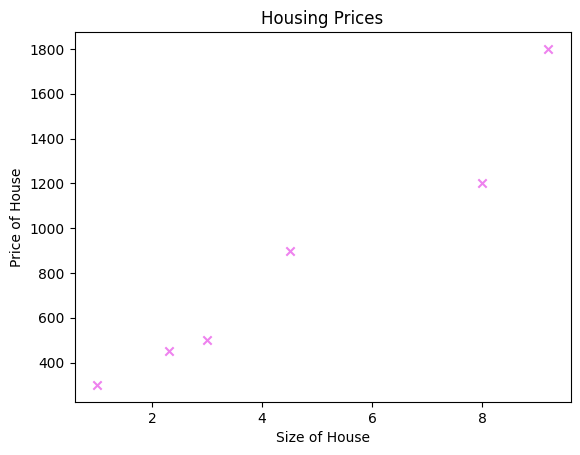

In [5]:
plt.scatter(x_train,y_train, marker="x", c = "violet")
plt.title("Housing Prices")
plt.xlabel("Size of House")
plt.ylabel("Price of House")
plt.show()

* Now we let an initial w, b and then we will perform the gradient descent to get to the exact values of w, b obtained after Linear Regression.

In [6]:
w=100
b=100
print(f"w = {w}")
print(f"b = {b}")

w = 100
b = 100


In [7]:
m = x_train.shape[0]

* For performing the gradient descent we need only the gradient. So, we make the compute_gradient function, which takes as input w, b, and the training set and gives back the gradient.
* But for visualisation purpose we also need to see how the cost is changing. So, we also make the compute_cost function, which takes as input w, b, and the training set and gives the cost at these values of w and b. Ideally as gradient descent runs, the cost should go on decreasing.
* Then we also make a function compute_prediction gives the prediction vector wrt those values of w, b. This can be used to plot the prediction.

In [8]:
def compute_gradient(x,y,w,b):
  #our goal is to return dj_db and dj_dw
  m=x.shape[0];
  dj_db=0
  dj_dw=0
  for i in range(m):
    num = w*x[i]+b-y[i]
    dj_dw= dj_dw + num*x[i]
    dj_db=dj_db + num
  return dj_db/m,dj_dw/m

In [9]:
def compute_cost(w,b,x,y):
  m=x.shape[0]
  cost=0
  for i in range(m):
      diff = (w*x[i]+b)-y[i];
      cost = cost + diff**2
  return cost/m

In [10]:
def compute_prediction(w,b, x_train):
  m=x_train.shape[0]
  output = np.zeros(m)
  for i in range(m):
    s = x_train[i]*w+b
    output[i]=s
  return output

* Let's see how our model is performing with the initial values of w and b.
* We can see that the model is not performing that well, it doesn't pass through the points and is totally outside.

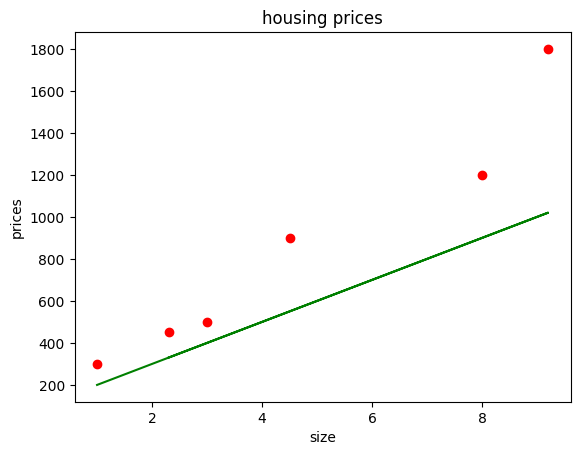

In [11]:
prediction = compute_prediction(w,b,x_train)
plt.plot(x_train,prediction,c="green",label="prediction")
plt.scatter(x_train,y_train,c="red",label="expected")
plt.title("housing prices")
plt.xlabel("size")
plt.ylabel("prices")
plt.show()

In [12]:
print(compute_cost(w,b,x_train,y_train))

142550.00000000003


In [13]:
import math,copy

* So, Now we need to perform gradient descent to get values of w and b, such that the cost can be minimized.
* The function for gradient descenet will take as input the initial w and b, and the alpha, #iterations and the training set in order to perform the gradient descent.

In [14]:
def perform_gradient_descent(w_int,b_int,alpha,iterations,x,y):
  j_his=[]
  w=w_int
  b=b_int
  initial_cost=compute_cost(w,b,x,y)
  print(f"initial cost = {initial_cost}")
  j_his.append(initial_cost)
  for i in range(iterations):
    dj_db,dj_dw= compute_gradient(x,y,w,b)
    w=w-alpha*dj_dw
    b=b-alpha*dj_db
    current_cost=compute_cost(w,b,x,y)
    j_his.append(current_cost)
    if i%(iterations//10)==0:
      print(f"current cost = {current_cost} dj_db = {dj_db} dj_dw = {dj_dw} w = {w} b = {b}\n")
  return j_his,w,b


In [15]:
cost_history,w,b = perform_gradient_descent(w,b,0.03,100000,x_train,y_train)

initial cost = 142550.00000000003
current cost = 16566.52651341667 dj_db = -291.6666666666667 dj_dw = -1971.1666666666667 w = 159.135 b = 108.75

current cost = 15752.512354138133 dj_db = 2.368475785867001e-13 dj_dw = -3.055333763768431e-13 w = 168.40039865454077 b = 72.46480627880999

current cost = 15752.512354138133 dj_db = 2.368475785867001e-13 dj_dw = -3.055333763768431e-13 w = 168.40039865454077 b = 72.46480627880999

current cost = 15752.512354138133 dj_db = 2.368475785867001e-13 dj_dw = -3.055333763768431e-13 w = 168.40039865454077 b = 72.46480627880999

current cost = 15752.512354138133 dj_db = 2.368475785867001e-13 dj_dw = -3.055333763768431e-13 w = 168.40039865454077 b = 72.46480627880999

current cost = 15752.512354138133 dj_db = 2.368475785867001e-13 dj_dw = -3.055333763768431e-13 w = 168.40039865454077 b = 72.46480627880999

current cost = 15752.512354138133 dj_db = 2.368475785867001e-13 dj_dw = -3.055333763768431e-13 w = 168.40039865454077 b = 72.46480627880999

current 

* Here we plot the graph to see how the cost has changed with the number of iterations of gradient descent.

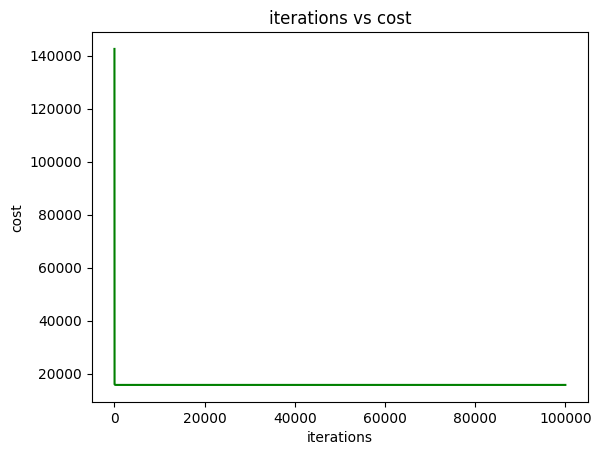

In [22]:
plt.plot(range(len(cost_history)),cost_history,c="green")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("iterations vs cost")
plt.show()

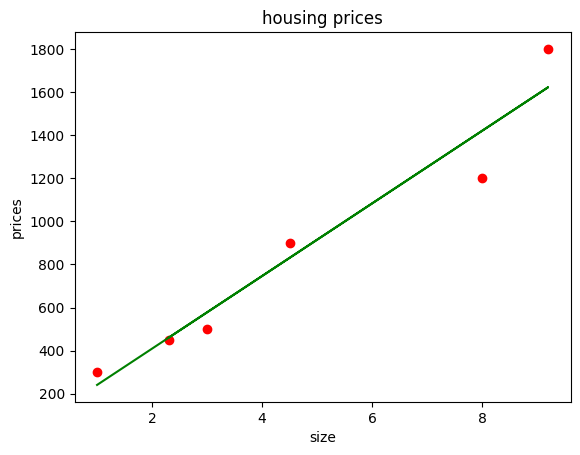

In [17]:
predict=compute_prediction(w,b,x_train)
plt.plot(x_train,predict,c="green",label="prediction")
plt.scatter(x_train,y_train,c="red",label="values")
plt.title("housing prices")
plt.xlabel("size")
plt.ylabel("prices")
plt.show()

* We see that the model has fit quite well and the line passes through the points quite well.
* So, We can say that our gradient descent has worked well.

### YOU HAVE LEARNT LINEAR REGRESSION IMPLEMENTATION WITH ONE FEATURE!!!!

# CONGRATULATIONS !!!